In [2]:
#Generate synthetic data
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data for the past 10 years
years = np.arange(2013, 2023)
data = {
    'Year': years,
    '% Renewable Energy': np.random.uniform(15, 40, len(years)),  # Percentage
    '% Energy from CHP': np.random.uniform(10, 30, len(years)),  # Combined heat and power
    'Scope 1 Emissions': np.random.uniform(200, 500, len(years)),  # Direct emissions
    'Scope 2 Emissions': np.random.uniform(300, 700, len(years)),  # Indirect emissions
    'Scope 3 Emissions': np.random.uniform(1000, 1500, len(years)),  # Supply chain emissions
    'Carbon Intensity (Revenue)': np.random.uniform(0.2, 0.5, len(years)),  # Per unit revenue
    'Carbon Intensity (Employee)': np.random.uniform(5, 15, len(years)),  # Per employee
    'Energy Consumption (Revenue)': np.random.uniform(1, 5, len(years)),  # Energy per unit revenue
    'Energy Efficiency (% R&D)': np.random.uniform(2, 5, len(years)),  # % R&D investment
    '% Waste Recycled': np.random.uniform(50, 80, len(years)),  # Waste recycled
    'Hazardous Waste (Unit)': np.random.uniform(1, 10, len(years)),  # Hazardous waste per unit
    'Water Consumption (Unit)': np.random.uniform(10, 50, len(years)),  # Water consumption per unit
    'ESG Score': np.random.uniform(50, 80, len(years))  # Scale 0-100
}

df = pd.DataFrame(data)
print(df.head())

# Save as a CSV if needed
df.to_csv("synthetic_esg_data.csv", index=False)


   Year  % Renewable Energy  % Energy from CHP  Scope 1 Emissions  \
0  2013           24.363503          10.411690         383.555868   
1  2014           38.767858          29.398197         241.848158   
2  2015           33.299849          26.648853         287.643395   
3  2016           29.966462          14.246782         309.908553   
4  2017           18.900466          13.636499         336.820995   

   Scope 2 Emissions  Scope 3 Emissions  Carbon Intensity (Revenue)  \
0         543.017941        1061.019117                    0.490875   
1         368.209649        1247.588455                    0.432540   
2         326.020637        1017.194261                    0.481850   
3         679.554215        1454.660201                    0.468448   
4         686.252813        1129.389991                    0.379370   

   Carbon Intensity (Employee)  Energy Consumption (Revenue)  \
0                     8.886773                      4.088979   
1                     7.713490

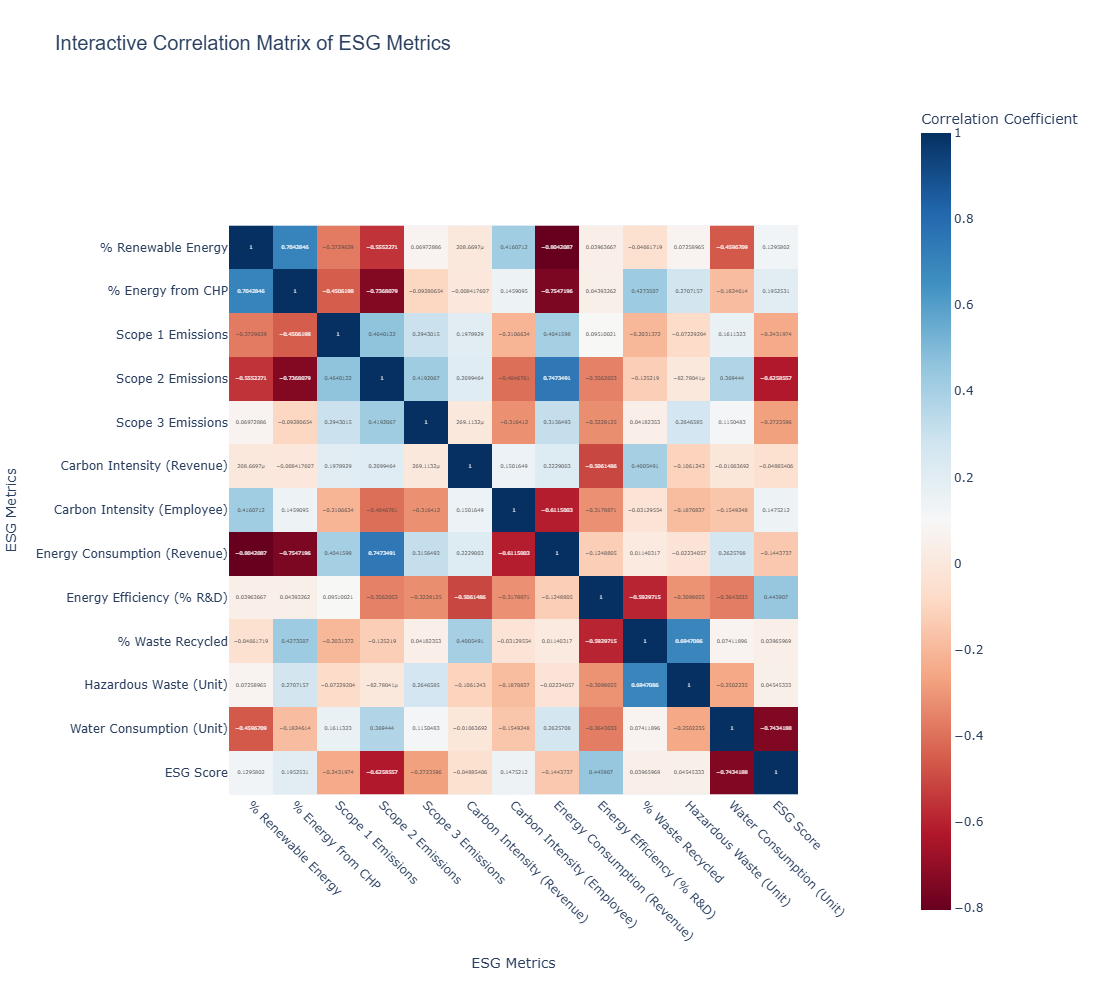

In [20]:
import pandas as pd
import plotly.express as px

# Drop the 'Year' column if it's present in the DataFrame
df_without_year = df.drop(columns=['Year'])

# Compute Correlation Matrix
correlation_matrix = df_without_year.corr()

# Create an interactive heatmap with correlation numbers
fig = px.imshow(
    correlation_matrix,
    labels=dict(color="Correlation Coefficient"),  # Label for the color scale
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    color_continuous_scale="RdBu",  # Use a valid Plotly colorscale
    title="Interactive Correlation Matrix of ESG Metrics",
    text_auto=True  # Automatically add the correlation numbers to the cells
)

# Adjust layout for better visibility
fig.update_layout(
    title_font_size=20,  # Larger title font
    title_font_family="Arial",
    xaxis_title="ESG Metrics",
    yaxis_title="ESG Metrics",
    xaxis_tickangle=45,  # Rotate x-axis labels for readability
    width=1000,  # Set width for better viewing
    height=1000  # Set height for better viewing
)

# Show the interactive plot
fig.show()


In [22]:
correlation_matrix
# Save the correlation matrix to an Excel file
correlation_matrix.to_excel("correlation_matrix.xlsx")

print("Correlation matrix saved as 'correlation_matrix.xlsx'")

Correlation matrix saved as 'correlation_matrix.xlsx'


C:\Users\Siddhi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



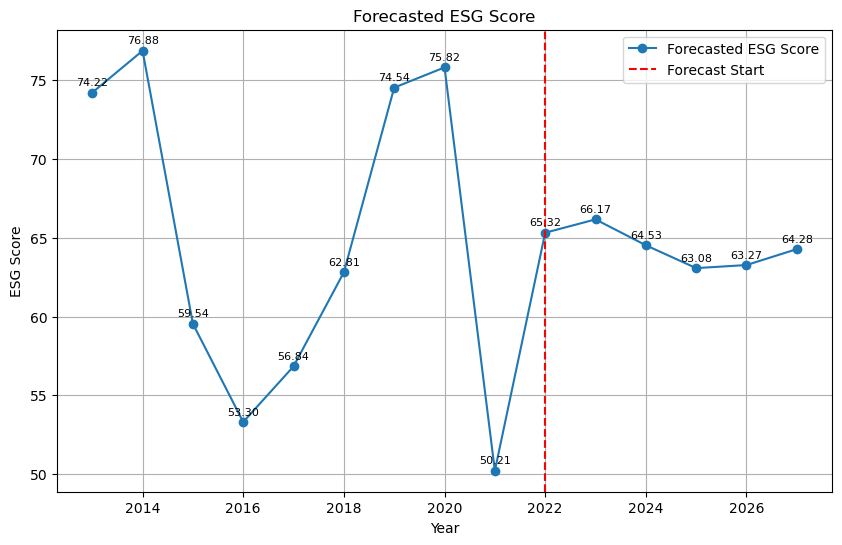

In [96]:
#Time-series forecasting
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the data (replace 'df' and 'Year' with your dataset column names)
values = df['ESG Score']
years = df['Year']

# ARIMA model with optimized parameters (adjust p and q if needed)
model = ARIMA(values, order=(2, 0, 1))  # Adjust p and q
model_fit = model.fit()

# Forecast for the next 5 years
forecast_years = np.arange(2023, 2028)
forecast = model_fit.forecast(steps=5)

# Combine historical and forecasted data
forecast_results = pd.DataFrame({
    'Year': np.concatenate([years, forecast_years]),
    'ESG Score': np.concatenate([values, forecast])
})

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(forecast_results['Year'], forecast_results['ESG Score'], marker='o', label='Forecasted ESG Score')
# Add labels for each point
for x, y in zip(forecast_results['Year'], forecast_results['ESG Score']):
    plt.annotate(f'{y:.2f}',  # Format the value to two decimal places
                 (x, y),      # Coordinates of the label
                 textcoords="offset points", xytext=(0, 5),  # Offset the label slightly above the point
                 ha='center', fontsize=8)  # Center-align the text and set font size

plt.axvline(x=2022, color='red', linestyle='--', label='Forecast Start')
plt.title("Forecasted ESG Score")
plt.xlabel("Year")
plt.ylabel("ESG Score")
plt.grid()
plt.legend()
plt.show()


In [30]:
forecast_df = pd.concat(forecast_results.values(), axis=1)
forecast_df.to_excel("forecasted_metrics.xlsx", index=False)
print("Saved all forecast data to 'forecasted_metrics.xlsx'")


Saved all forecast data to 'forecasted_metrics.xlsx'


In [16]:
#Regression Modeling for ESG score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for regression
X = df.drop(columns=['Year', 'ESG Score'])  # All metrics except ESG Score
y = df['ESG Score']  # Target variable

# Split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature Importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance for ESG Score Prediction:")
print(coefficients)


Mean Squared Error: 107.11896099922541

Feature Importance for ESG Score Prediction:
                         Feature  Coefficient
7   Energy Consumption (Revenue)     0.098810
8      Energy Efficiency (% R&D)     0.069887
4              Scope 3 Emissions     0.011881
2              Scope 1 Emissions     0.008954
5     Carbon Intensity (Revenue)    -0.007966
10        Hazardous Waste (Unit)    -0.011607
3              Scope 2 Emissions    -0.064257
6    Carbon Intensity (Employee)    -0.243458
9               % Waste Recycled    -0.308345
1              % Energy from CHP    -0.331426
11      Water Consumption (Unit)    -0.351282
0             % Renewable Energy    -0.607312


In [133]:
#What-if Scenario Analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Feature scaling
scaler = StandardScaler()

# Define enhanced scenarios
scenarios = [
    {'Scenario': 'Baseline', '% Renewable Energy': 35, '% Energy from CHP': 20, 'Scope 1 Emissions': 500,
     'Scope 2 Emissions': 600, 'Scope 3 Emissions': 1200, 'Carbon Intensity (Revenue)': 0.3,
     'Carbon Intensity (Employee)': 10, 'Energy Consumption (Revenue)': 3.5, 'Energy Efficiency (% R&D)': 4,
     '% Waste Recycled': 55, 'Hazardous Waste (Unit)': 20, 'Water Consumption (Unit)': 55},
    {'Scenario': 'High Renewable', '% Renewable Energy': 75, '% Energy from CHP': 40, 'Scope 1 Emissions': 100,
     'Scope 2 Emissions': 300, 'Scope 3 Emissions': 1000, 'Carbon Intensity (Revenue)': 0.3,
     'Carbon Intensity (Employee)': 10, 'Energy Consumption (Revenue)': 3.5, 'Energy Efficiency (% R&D)': 4,
     '% Waste Recycled': 55, 'Hazardous Waste (Unit)': 5, 'Water Consumption (Unit)': 25},
    {'Scenario': 'Reduced Emissions', '% Renewable Energy': 50, '% Energy from CHP': 20, 'Scope 1 Emissions': 150,
     'Scope 2 Emissions': 250, 'Scope 3 Emissions': 900, 'Carbon Intensity (Revenue)': 0.3,
     'Carbon Intensity (Employee)': 10, 'Energy Consumption (Revenue)': 3.5, 'Energy Efficiency (% R&D)': 4,
     '% Waste Recycled': 90, 'Hazardous Waste (Unit)': 5, 'Water Consumption (Unit)': 25},
]

# Create DataFrame for scenarios
scenario_df = pd.DataFrame(scenarios)

# Scale the features using training data scaling
scaled_features = scaler.fit_transform(scenario_df.drop(columns=['Scenario']))

# Train an example XGBoost model
# Replace the training data (X_train, y_train) with your actual data
X_train = np.random.rand(100, len(scenario_df.columns) - 1)
y_train = np.random.rand(100)
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict ESG scores
predicted_scores = model.predict(scaled_features)

# Rescale predictions to range [1, 100]
min_target, max_target = 1, 100
scenario_df['ESG_Score_Predicted'] = min_target + (predicted_scores * (max_target - min_target))

# Analyze predictions
print("\nScenario Predictions:")
print(scenario_df)

# Save results for review
scenario_df.to_csv("scenario_analysis_results_scaled.csv", index=False)
print("\nScenario results saved to 'scenario_analysis_results_scaled.csv'")



Scenario Predictions:
            Scenario  % Renewable Energy  % Energy from CHP  \
0           Baseline                  35                 20   
1     High Renewable                  75                 40   
2  Reduced Emissions                  50                 20   

   Scope 1 Emissions  Scope 2 Emissions  Scope 3 Emissions  \
0                500                600               1200   
1                100                300               1000   
2                150                250                900   

   Carbon Intensity (Revenue)  Carbon Intensity (Employee)  \
0                         0.3                           10   
1                         0.3                           10   
2                         0.3                           10   

   Energy Consumption (Revenue)  Energy Efficiency (% R&D)  % Waste Recycled  \
0                           3.5                          4                55   
1                           3.5                          4        

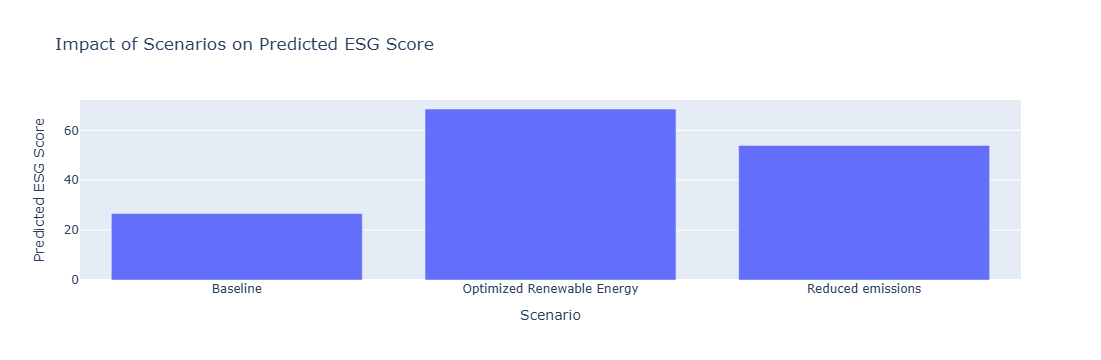

In [135]:
# Visualize ESG Score predictions for scenarios
scenario_plot = scenario_df.copy()
scenario_plot['Scenario'] = ['Baseline', 'Optimized Renewable Energy', 'Reduced emissions']

fig = px.bar(
    scenario_plot,
    x='Scenario',
    y='ESG_Score_Predicted',
    title="Impact of Scenarios on Predicted ESG Score",
    labels={'ESG_Score_Predicted': 'Predicted ESG Score'}
)
fig.show()


In [121]:
scenario_plot['Score Change (%)'] = ((scenario_plot['ESG_Score_Predicted'] - scenario_plot['ESG_Score_Predicted'][0]) / scenario_plot['ESG_Score_Predicted'][0]) * 100
scenario_plot['Score Change (%)']

0     0.000000
1   -37.837204
2   -16.763609
Name: Score Change (%), dtype: float32